In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/khanguyen0510/FlixView_analysis/main/data/netflix_titles.csv"
df = pd.read_csv(url)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


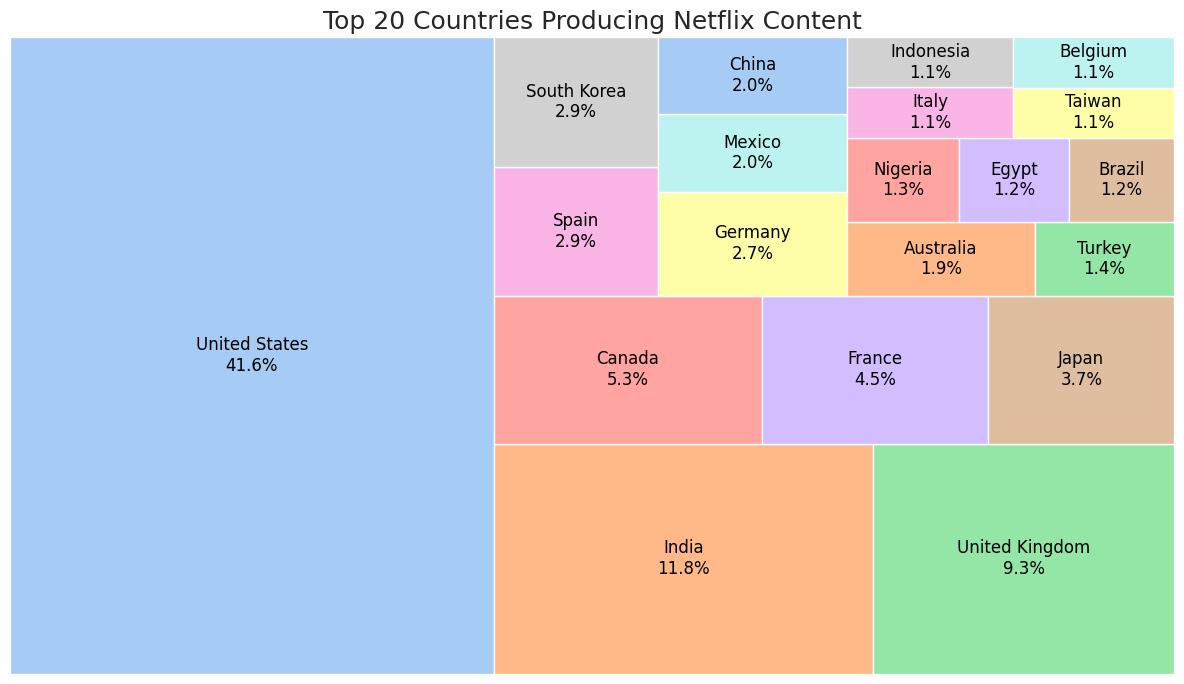

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

url = "https://raw.githubusercontent.com/khanguyen0510/FlixView_analysis/main/data/netflix_titles.csv"
df = pd.read_csv(url)

df_country = df[df["release_year"] > 2000].copy()
df_country = df_country.dropna(subset=["country"])
df_country["country_split"] = df_country["country"].str.split(", ")
df_exploded = df_country.explode("country_split")

top_countries = df_exploded["country_split"].value_counts().head(20)

total = top_countries.sum()
labels = [
    f"{country}\n{count / total:.1%}"
    for country, count in zip(top_countries.index, top_countries.values)
]

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel", len(top_countries))

squarify.plot(
    sizes=top_countries.values,
    label=labels,
    color=colors,
    alpha=0.95,
    text_kwargs={
        'fontsize': 12,
        'color': 'black'
    }
)

plt.title("Top 20 Countries Producing Netflix Content",
          fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

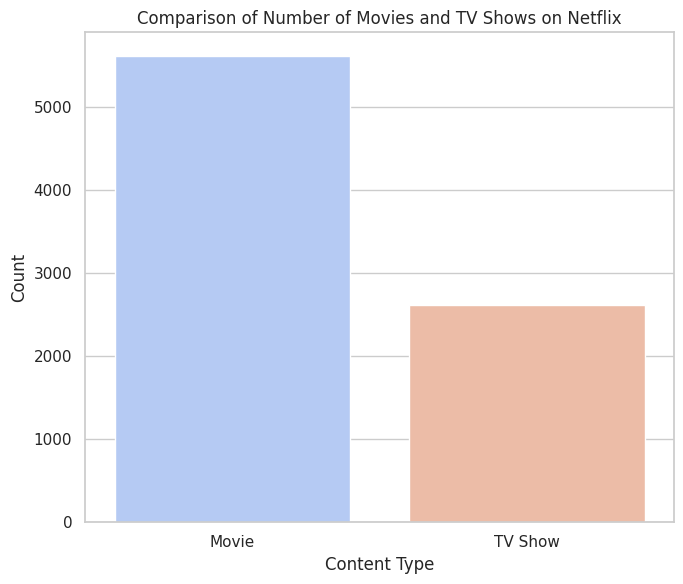

In [67]:
df_type = df[df["release_year"] > 2000].copy()
df_type = df_type.dropna(subset=["type"])

type_counts = df_type["type"].value_counts().reset_index()
type_counts.columns = ["Type", "Count"]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

sns.barplot(
    data=type_counts,
    x="Type",
    y="Count",
    hue="Type",
    palette="coolwarm",
    legend=False
)

plt.title("Comparison of Number of Movies and TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


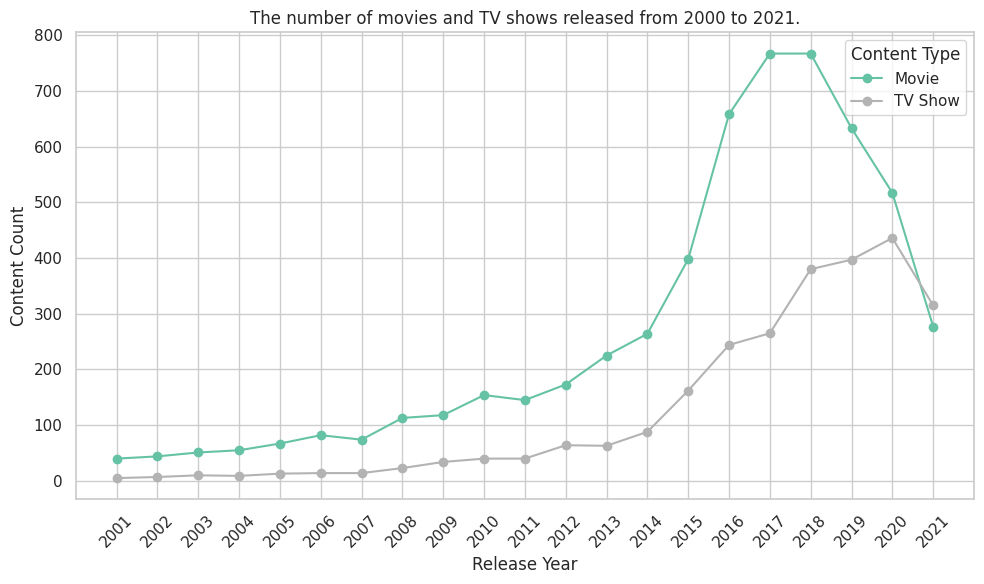

In [63]:
import pandas as pd

url = "https://raw.githubusercontent.com/khanguyen0510/FlixView_analysis/main/data/netflix_titles.csv"
df = pd.read_csv(url)

df = df.dropna(subset=["release_year"])
df["release_year"] = df["release_year"].astype(int)

df_recent = df[df["release_year"] > 2000]

release_trend = df_recent.groupby(["release_year", "type"]).size().unstack().fillna(0)

all_years = pd.Index(range(2001, df_recent["release_year"].max() + 1))
release_trend = release_trend.reindex(all_years, fill_value=0)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

ax = release_trend.plot(kind='line', marker='o', colormap='Set2')

plt.title("The number of movies and TV shows released from 2000 to 2021.")
plt.xlabel("Release Year")
plt.ylabel("Content Count")
plt.xticks(rotation=45)

ax.set_xticks(all_years)

plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


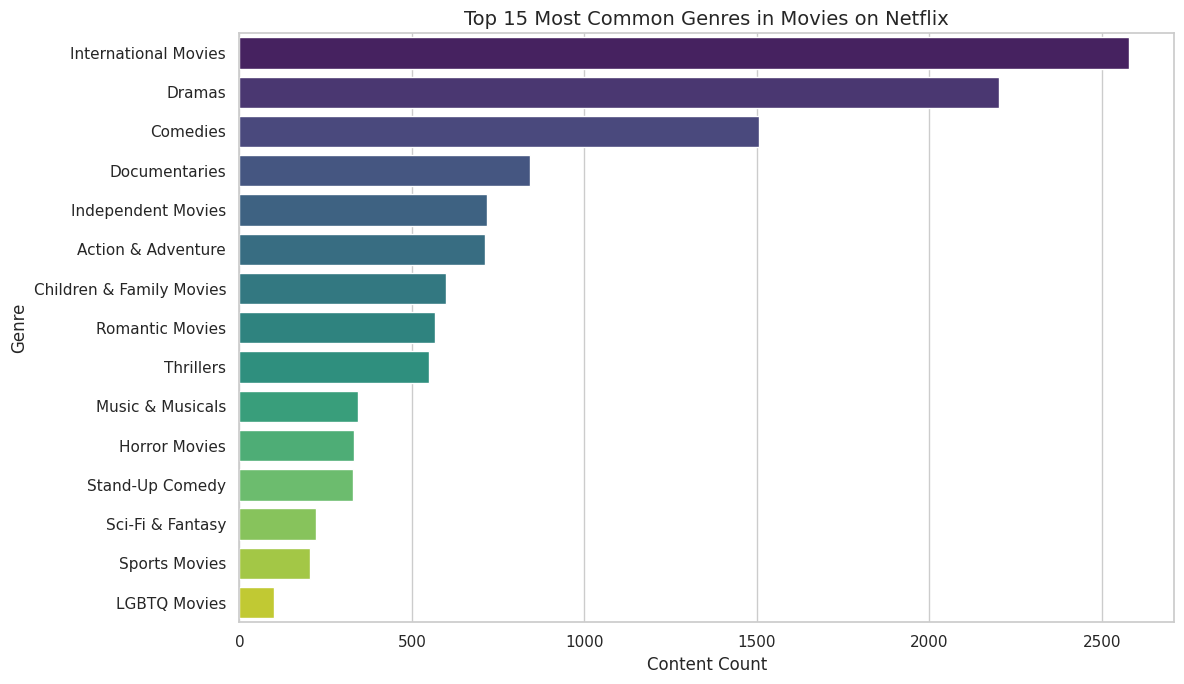

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/khanguyen0510/FlixView_analysis/main/data/netflix_titles.csv"
df = pd.read_csv(url)

df_movie = df[(df["release_year"] > 2000) & (df["type"] == "Movie")].copy()
df_movie = df_movie.dropna(subset=["listed_in"])

df_movie["genre"] = df_movie["listed_in"].str.split(", ")
df_exploded = df_movie.explode("genre")

genre_counts = df_exploded["genre"].value_counts().head(15)

genre_df = genre_counts.reset_index()
genre_df.columns = ['genre', 'count']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

sns.barplot(
    data=genre_df,
    x='count',
    y='genre',
    hue='genre',
    palette='viridis',
    legend=False
)

plt.title("Top 15 Most Common Genres in Movies on Netflix", fontsize=14)
plt.xlabel("Content Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


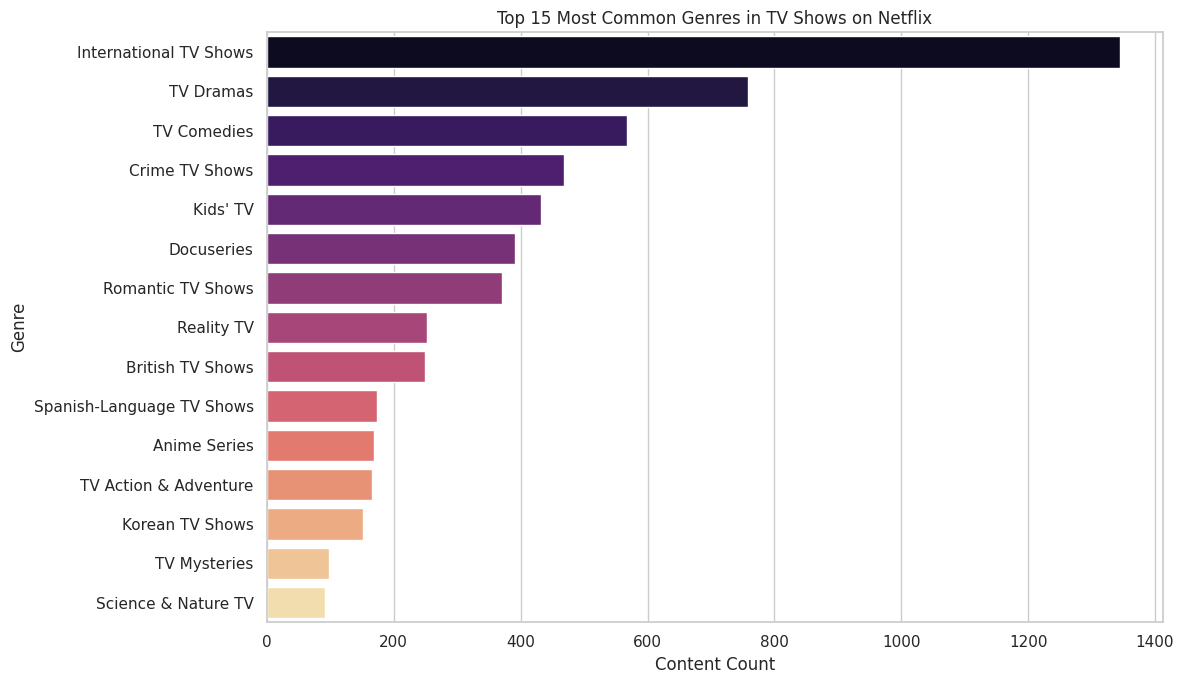

In [65]:
df_tv = df[(df["release_year"] > 2000) & (df["type"] == "TV Show")].copy()
df_tv = df_tv.dropna(subset=["listed_in"])

df_tv["genre"] = df_tv["listed_in"].str.split(", ")
df_tv_exploded = df_tv.explode("genre")

tv_genre_counts = df_tv_exploded["genre"].value_counts().head(15)
tv_genre_df = tv_genre_counts.reset_index()
tv_genre_df.columns = ["genre", "count"]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

sns.barplot(
    data=tv_genre_df,
    x="count",
    y="genre",
    hue="genre",
    palette="magma",
    legend=False
)

plt.title("Top 15 Most Common Genres in TV Shows on Netflix")
plt.xlabel("Content Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
